Yolo v5 다운로드 및 설치

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12265, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 12265 (delta 3), reused 6 (delta 1), pack-reused 12250
Receiving objects: 100% (12265/12265), 12.03 MiB | 25.92 MiB/s, done.
Resolving deltas: 100% (8489/8489), done.


In [2]:
!cd yolov5;pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 5.4 MB/s 


XML 포맷의 BCCD 데이터 세트를 다운로드 후 voc2coco를 이용하여 ms-coco 형태로 변환.

In [3]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 32.74 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [4]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 436 (delta 11), reused 19 (delta 6), pack-reused 409
Receiving objects: 100% (436/436), 216.32 KiB | 5.85 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [5]:
with open("/content/BCCD_Dataset/BCCD/labels.txt","w") as f:
  f.write("RBC\n")
  f.write("WBC\n")
  f.write("Platelets")

In [6]:
%cd /content/voc2coco

# VOC를 COCO로 변환 수행. 학습/검증/테스트 용 json annotation을 생성. 
!python voc2coco.py \
    --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
    --ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
    --labels  /content/BCCD_Dataset/BCCD/labels.txt\
    --output /content/BCCD_Dataset/BCCD/train.json \
    --ext xml

!python voc2coco.py \
    --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
    --ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
    --labels  /content/BCCD_Dataset/BCCD/labels.txt\
    --output /content/BCCD_Dataset/BCCD/val.json \
    --ext xml

!python voc2coco.py \
    --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
    --ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
    --labels  /content/BCCD_Dataset/BCCD/labels.txt\
    --output /content/BCCD_Dataset/BCCD/test.json \
    --ext xml

/content/voc2coco
Start converting !
100% 205/205 [00:00<00:00, 4466.27it/s]
Start converting !
100% 87/87 [00:00<00:00, 4949.00it/s]
Start converting !
100% 72/72 [00:00<00:00, 5234.25it/s]


In [ ]:
!sudo apt-get install jq
!jq . /content/BCCD_Dataset/BCCD/val.json > output.json

In [8]:
!head -50000 output.json

{
  "images": [
    {
      "file_name": "BloodImage_00000.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00000"
    },
    {
      "file_name": "BloodImage_00002.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00002"
    },
    {
      "file_name": "BloodImage_00014.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00014"
    },
    {
      "file_name": "BloodImage_00017.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00017"
    },
    {
      "file_name": "BloodImage_00028.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00028"
    },
    {
      "file_name": "BloodImage_00029.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00029"
    },
    {
      "file_name": "BloodImage_00030.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00030"
    },
    {
      "file_name": "BloodImage_00035.jpg",
      "height": 480,
      "width": 640

COCO 포맷을 Ultralytics yolo 포맷으로 변환(COCO2YOLO 스크립트를 사용하여 변환)

In [9]:
!pwd

/content/voc2coco


In [10]:
%cd /content

/content


In [11]:
!pwd

/content


In [12]:
!git clone https://github.com/alexmihalyk23/COCO2YOLO.git

Cloning into 'COCO2YOLO'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 63 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [13]:
import json
import os
import shutil

# https://github.com/alexmihalyk23/COCO2YOLO.git 를 약간 수정

class COCO2YOLO:
    def __init__(self,src_img_dir, json_file, tgt_img_dir, tgt_anno_dir):

        self.src_img_dir=src_img_dir
        self.json_file=json_file
        self.tgt_img_dir=tgt_img_dir
        self.tgt_anno_dir=tgt_anno_dir

        self._check_file_and_dir(json_file, tgt_img_dir, tgt_anno_dir)
        self.labels = json.load(open(json_file, 'r', encoding='utf-8'))
        self.coco_id_name_map = self._categories()
        self.coco_name_list = list(self.coco_id_name_map.values())

        print("total images", len(self.labels['images']))
        print("total categories", len(self.labels['categories']))
        print("total labels", len(self.labels['annotations']))

    def _check_file_and_dir(self, json_file, tgt_img_dir, tgt_anno_dir):
        if not os.path.exists(json_file):
            raise ValueError("file not found")
        if not os.path.exists(tgt_img_dir):
          os.makedirs(tgt_img_dir)
        if not os.path.exists(tgt_anno_dir):
            os.makedirs(tgt_anno_dir)

    def _categories(self):
        categories = {}
        for cls in self.labels['categories']:
            categories[cls['id']] = cls['name']
        return categories

    def _load_images_info(self):
        images_info = {}
        for image in self.labels['images']:
            id = image['id']
            file_name = image['file_name']
            if file_name.find('\\') > -1:
                file_name = file_name[file_name.index('\\')+1:]
            w = image['width']
            h = image['height']
            images_info[id] = (file_name, w, h)

        return images_info

    def _bbox_2_yolo(self, bbox, img_w, img_h):
        # The COCO bounding box format is [ x , y , width, height]
        x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
        centerx = bbox[0] + w / 2
        centery = bbox[1] + h / 2
        dw = 1 / img_w
        dh = 1 / img_h
        centerx *= dw
        w *= dw
        centery *= dh
        h *= dh
        return centerx, centery, w, h


    def _convert_anno(self, images_info):
        anno_dict = dict()
        for anno in self.labels['annotations']:
            bbox = anno['bbox']
            image_id = anno['image_id']
            category_id = anno['category_id']

            image_info = images_info.get(image_id)
            image_name = image_info[0]
            img_w = image_info[1]
            img_h = image_info[2]
            yolo_box = self._bbox_2_yolo(bbox, img_w, img_h)

            anno_info = (image_name, category_id, yolo_box)
            anno_infos = anno_dict.get(image_id)
            if not anno_infos:
                anno_dict[image_id] = [anno_info]
            else:
                anno_infos.append(anno_info)
                anno_dict[image_id] = anno_infos
        return anno_dict

    def save_classes(self):
        sorted_classes = list(map(lambda x: x['name'], sorted(self.labels['categories'], key=lambda x: x['id'])))
        print('coco names', sorted_classes)
        with open('coco.names', 'w', encoding='utf-8') as f:
            for cls in sorted_classes:
                f.write(cls + '\n')
        f.close()


    def _save_txt(self, anno_dict):
        for k, v in anno_dict.items():
            src_img_filename=os.path.join(self.src_img_dir,v[0][0])
            tgr_anno_filename=os.path.join(self.tgt_anno_dir,v[0][0].split(".")[0]+".txt")
            shutil.copy(src_img_filename,self.tgt_img_dir)
            with open(tgr_anno_filename, 'w', encoding='utf-8') as f:
                print(k, v)
                for obj in v:
                    cat_name = self.coco_id_name_map.get(obj[1])
                    category_id = self.coco_name_list.index(cat_name)
                    box = ['{:.6f}'.format(x) for x in obj[2]]
                    box = ' '.join(box)
                    line = str(category_id) + ' ' + box
                    f.write(line + '\n')


    def coco2yolo(self):
      print("loading image info...")
      images_info = self._load_images_info()
      print("loading done, total images", len(images_info))

      print("start converting...")
      anno_dict = self._convert_anno(images_info)
      print("converting done, total labels", len(anno_dict))

      print("saving txt file...")
      self._save_txt(anno_dict)
      print("saving done")


In [14]:
# 학습/검증/테스트용 images, labels 디렉토리 생성. 
!mkdir /content/bccd;
!cd /content/bccd; mkdir images; mkdir labels;
!cd /content/bccd/images; mkdir train; mkdir val; mkdir test
!cd /content/bccd/labels; mkdir train; mkdir val; mkdir test

In [15]:
# train 용 yolo 데이터 세트 생성. 
train_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/train.json',
                                 tgt_img_dir='/content/bccd/images/train', tgt_anno_dir='/content/bccd/labels/train')
train_yolo_converter.coco2yolo()

# val 용 yolo 데이터 세트 생성. 
val_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/val.json',
                                 tgt_img_dir='/content/bccd/images/val', tgt_anno_dir='/content/bccd/labels/val')
val_yolo_converter.coco2yolo()

# test 용 yolo 데이터 세트 생성. 
test_yolo_converter = COCO2YOLO(src_img_dir='/content/BCCD_Dataset/BCCD/JPEGImages', json_file='/content/BCCD_Dataset/BCCD/test.json',
                                 tgt_img_dir='/content/bccd/images/test', tgt_anno_dir='/content/bccd/labels/test')
test_yolo_converter.coco2yolo()

total images 205
total categories 3
total labels 2805
loading image info...
loading done, total images 205
start converting...
converting done, total labels 205
saving txt file...
BloodImage_00001 [('BloodImage_00001.jpg', 2, (0.27578125000000003, 0.8270833333333333, 0.34218750000000003, 0.3458333333333333)), ('BloodImage_00001.jpg', 1, (0.6179687500000001, 0.8479166666666667, 0.15781250000000002, 0.19583333333333333)), ('BloodImage_00001.jpg', 1, (0.1546875, 0.496875, 0.146875, 0.2520833333333333)), ('BloodImage_00001.jpg', 1, (0.76875, 0.915625, 0.1375, 0.16875)), ('BloodImage_00001.jpg', 1, (0.7875000000000001, 0.3572916666666667, 0.1375, 0.16875)), ('BloodImage_00001.jpg', 1, (0.7765625, 0.696875, 0.1375, 0.16875)), ('BloodImage_00001.jpg', 1, (0.721875, 0.6927083333333334, 0.14375000000000002, 0.21041666666666667)), ('BloodImage_00001.jpg', 1, (0.5046875000000001, 0.825, 0.14375000000000002, 0.22916666666666666)), ('BloodImage_00001.jpg', 1, (0.921875, 0.22916666666666666, 0.14375

Dataset용 yaml 파일을 생성하고 학습 수행

In [16]:
!wget -O /content/bccd/bccd.yaml https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/bccd.yaml

--2022-06-21 05:46:42--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/util/bccd.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘/content/bccd/bccd.yaml’

/content/bccd/bccd. 100%[===================>]     184  --.-KB/s    in 0s      

2022-06-21 05:46:43 (6.84 MB/s) - ‘/content/bccd/bccd.yaml’ saved [184/184]



In [17]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [19]:
!mkdir "/mydrive/ultra_workdir"

mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [20]:
!cd yolov5;python train.py --img 640 \
                           --batch 8 \
                           --epochs 30 \
                           --data /content/bccd/bccd.yaml \
                           --weights yolov5l.pt \
                           --project=/mydrive/ultra_workdir \
                           --name bccd \
                           --exist-ok

train: weights=yolov5l.pt, cfg=, data=/content/bccd/bccd.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/mydrive/ultra_workdir, name=bccd, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

In [21]:
# /content/data/output/run_img/BloodImage_00011.jpg
!cd yolov5;python detect.py --weights /content/gdrive/MyDrive/ultra_workdir/bccd/weights/best.pt \
                            --conf 0.2 \
                            --source /content/bccd/images/test/BloodImage_00011.jpg \
                            --project=/content/data/output \
                            --name=run_img \
                            --exist-ok \
                            --line-thickness 2

detect: weights=['/content/gdrive/MyDrive/ultra_workdir/bccd/weights/best.pt'], source=/content/bccd/images/test/BloodImage_00011.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_img, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 367 layers, 46119048 parameters, 0 gradients
image 1/1 /content/bccd/images/test/BloodImage_00011.jpg: 480x640 16 WBCs, 1 RBC, 1 Platelets, Done. (0.023s)
Speed: 0.5ms pre-process, 23.2ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_img


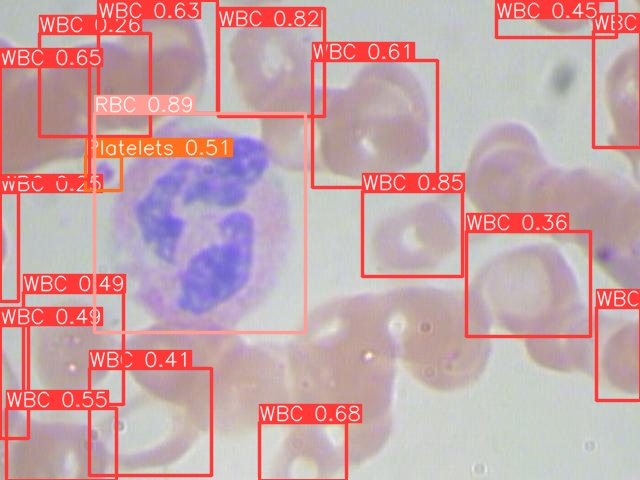

In [22]:
from IPython.display import Image
Image("/content/data/output/run_img/BloodImage_00011.jpg")

In [23]:
# /content/bccd/images/train/BloodImage_00071.jpg
!cd yolov5;python detect.py --weights /content/gdrive/MyDrive/ultra_workdir/bccd/weights/best.pt \
                            --conf 0.2 \
                            --source /content/bccd/images/train/BloodImage_00071.jpg \
                            --project=/content/data/output \
                            --name=run_img \
                            --exist-ok \
                            --line-thickness 2


detect: weights=['/content/gdrive/MyDrive/ultra_workdir/bccd/weights/best.pt'], source=/content/bccd/images/train/BloodImage_00071.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_img, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 367 layers, 46119048 parameters, 0 gradients
image 1/1 /content/bccd/images/train/BloodImage_00071.jpg: 480x640 18 WBCs, 1 RBC, 1 Platelets, Done. (0.024s)
Speed: 0.5ms pre-process, 23.9ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_img


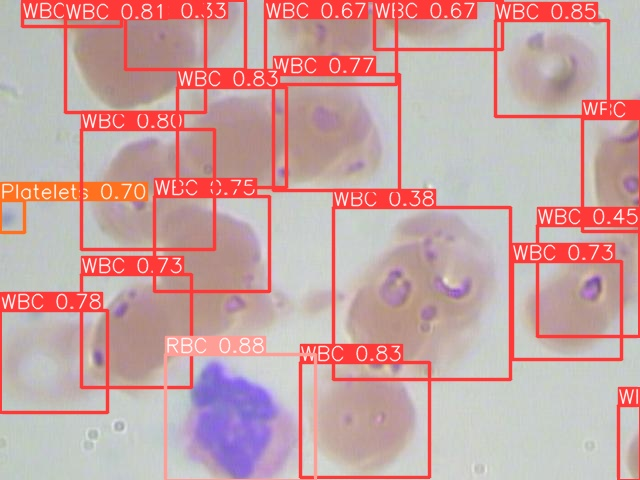

In [25]:
from IPython.display import Image
Image("/content/data/output/run_img/BloodImage_00071.jpg")

In [26]:
!cd yolov5;python val.py --weights /content/gdrive/MyDrive/ultra_workdir/bccd/weights/best.pt \
                         --data /content/bccd/bccd.yaml \
                         --project=/content/data/output \
                         --name=test_result \
                         --exist-ok \
                         --img 640 \
                         --iou 0.65

val: data=/content/bccd/bccd.yaml, weights=['/content/gdrive/MyDrive/ultra_workdir/bccd/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/data/output, name=test_result, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v6.1-258-g1156a32 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 367 layers, 46119048 parameters, 0 gradients
val: Scanning '/content/bccd/labels/val.cache' images and labels... 87 found, 0 missing, 0 empty, 0 corrupt: 100% 87/87 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:04<00:00,  1.53s/it]
                 all         87       1138      0.873      0.879      0.905      0.631
                 WBC         87        968      0.819      0.799      0.879 

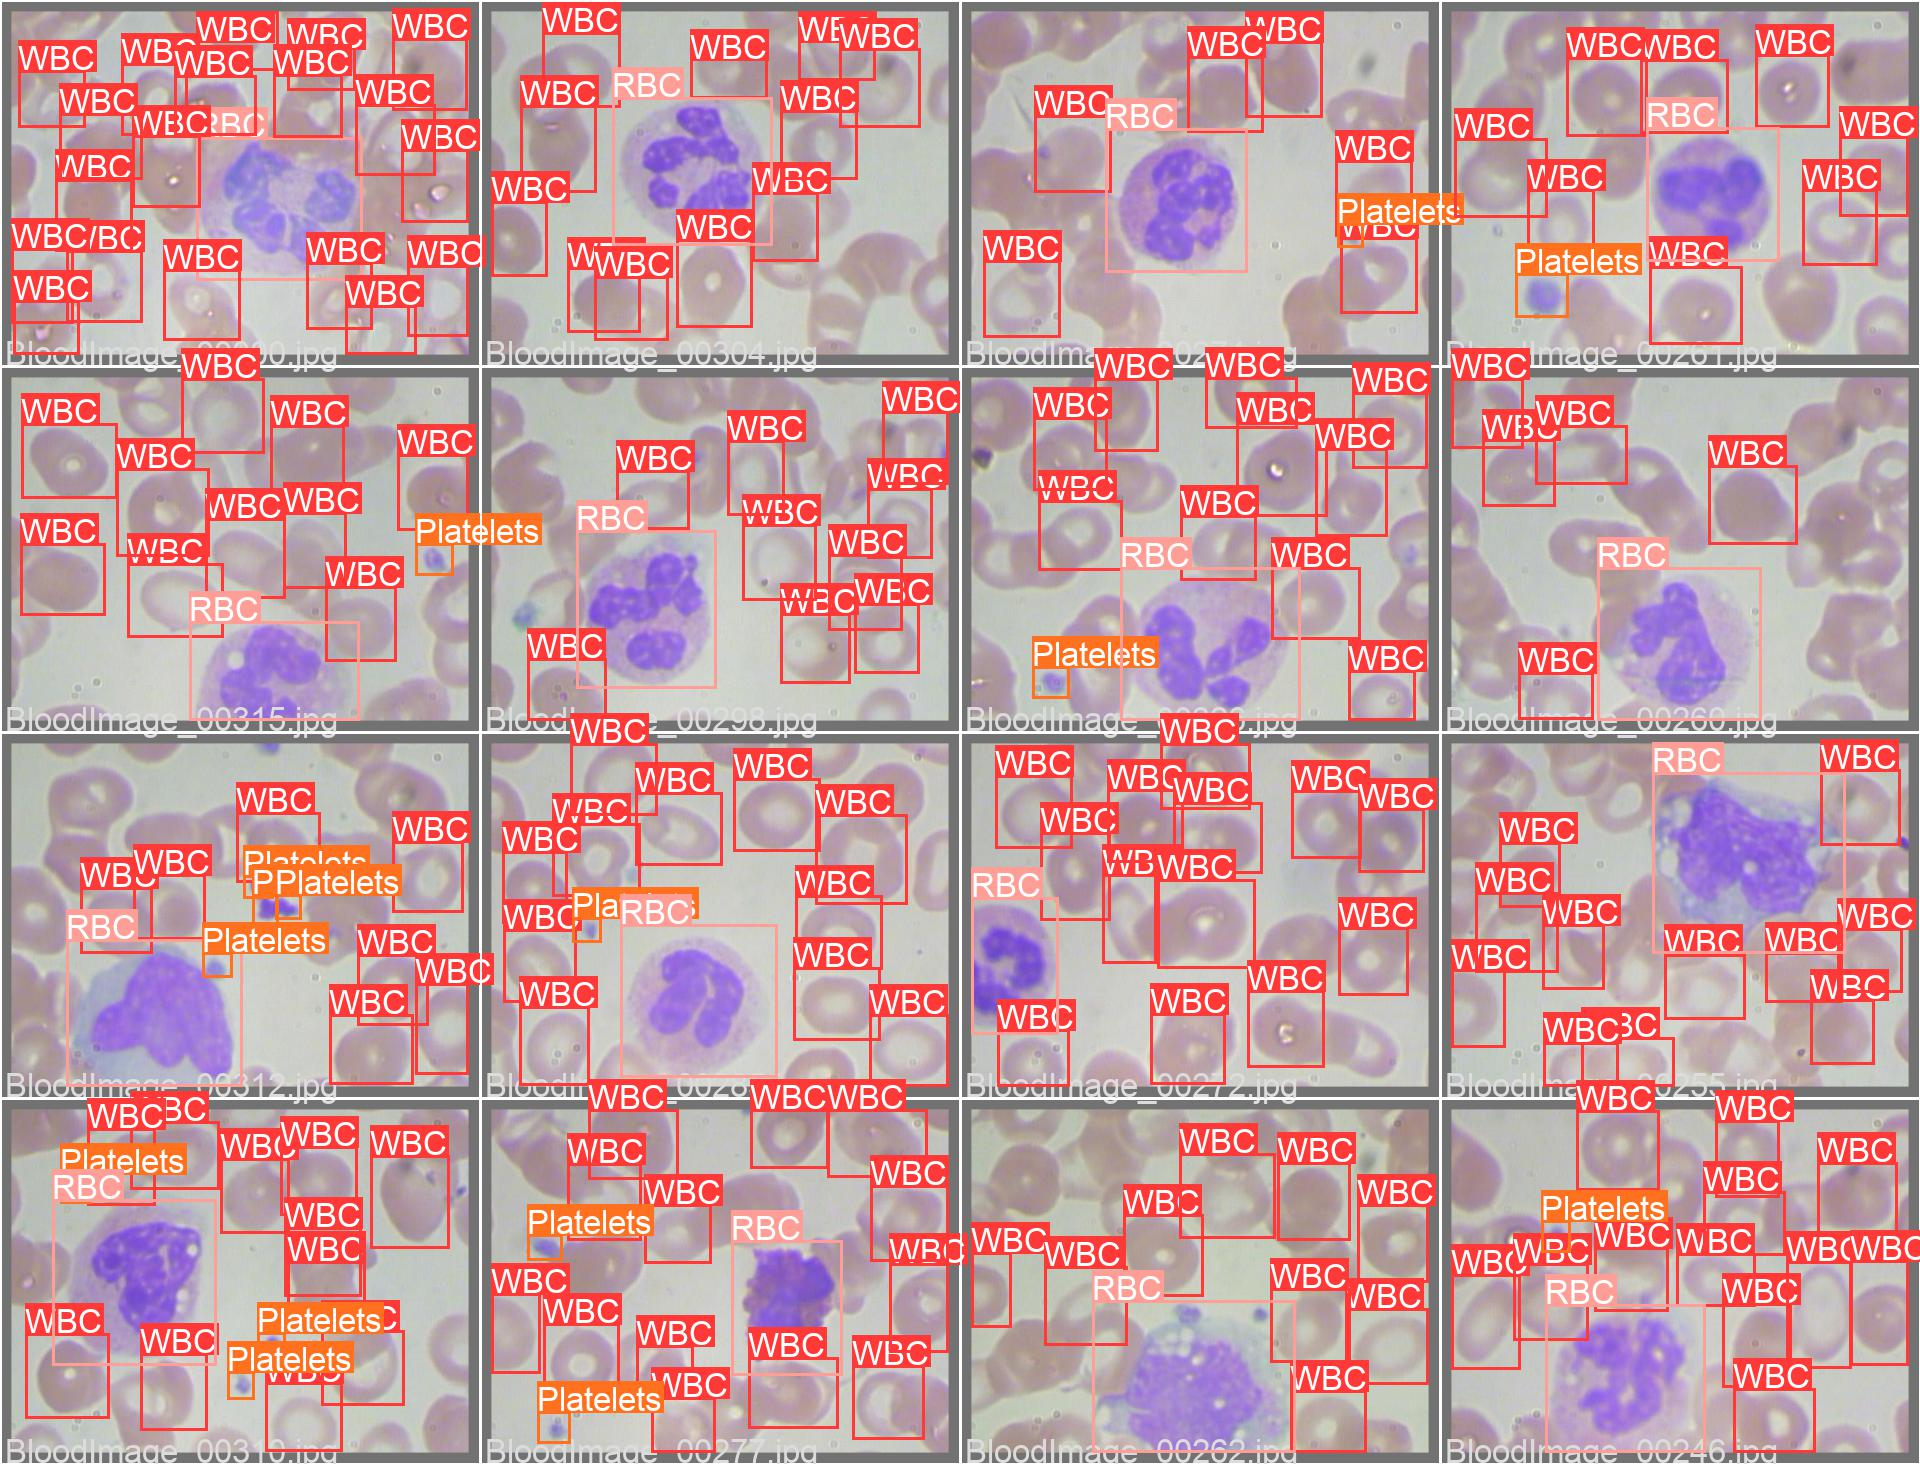

In [27]:
from IPython.display import Image
Image("/content/data/output/test_result/val_batch0_labels.jpg")

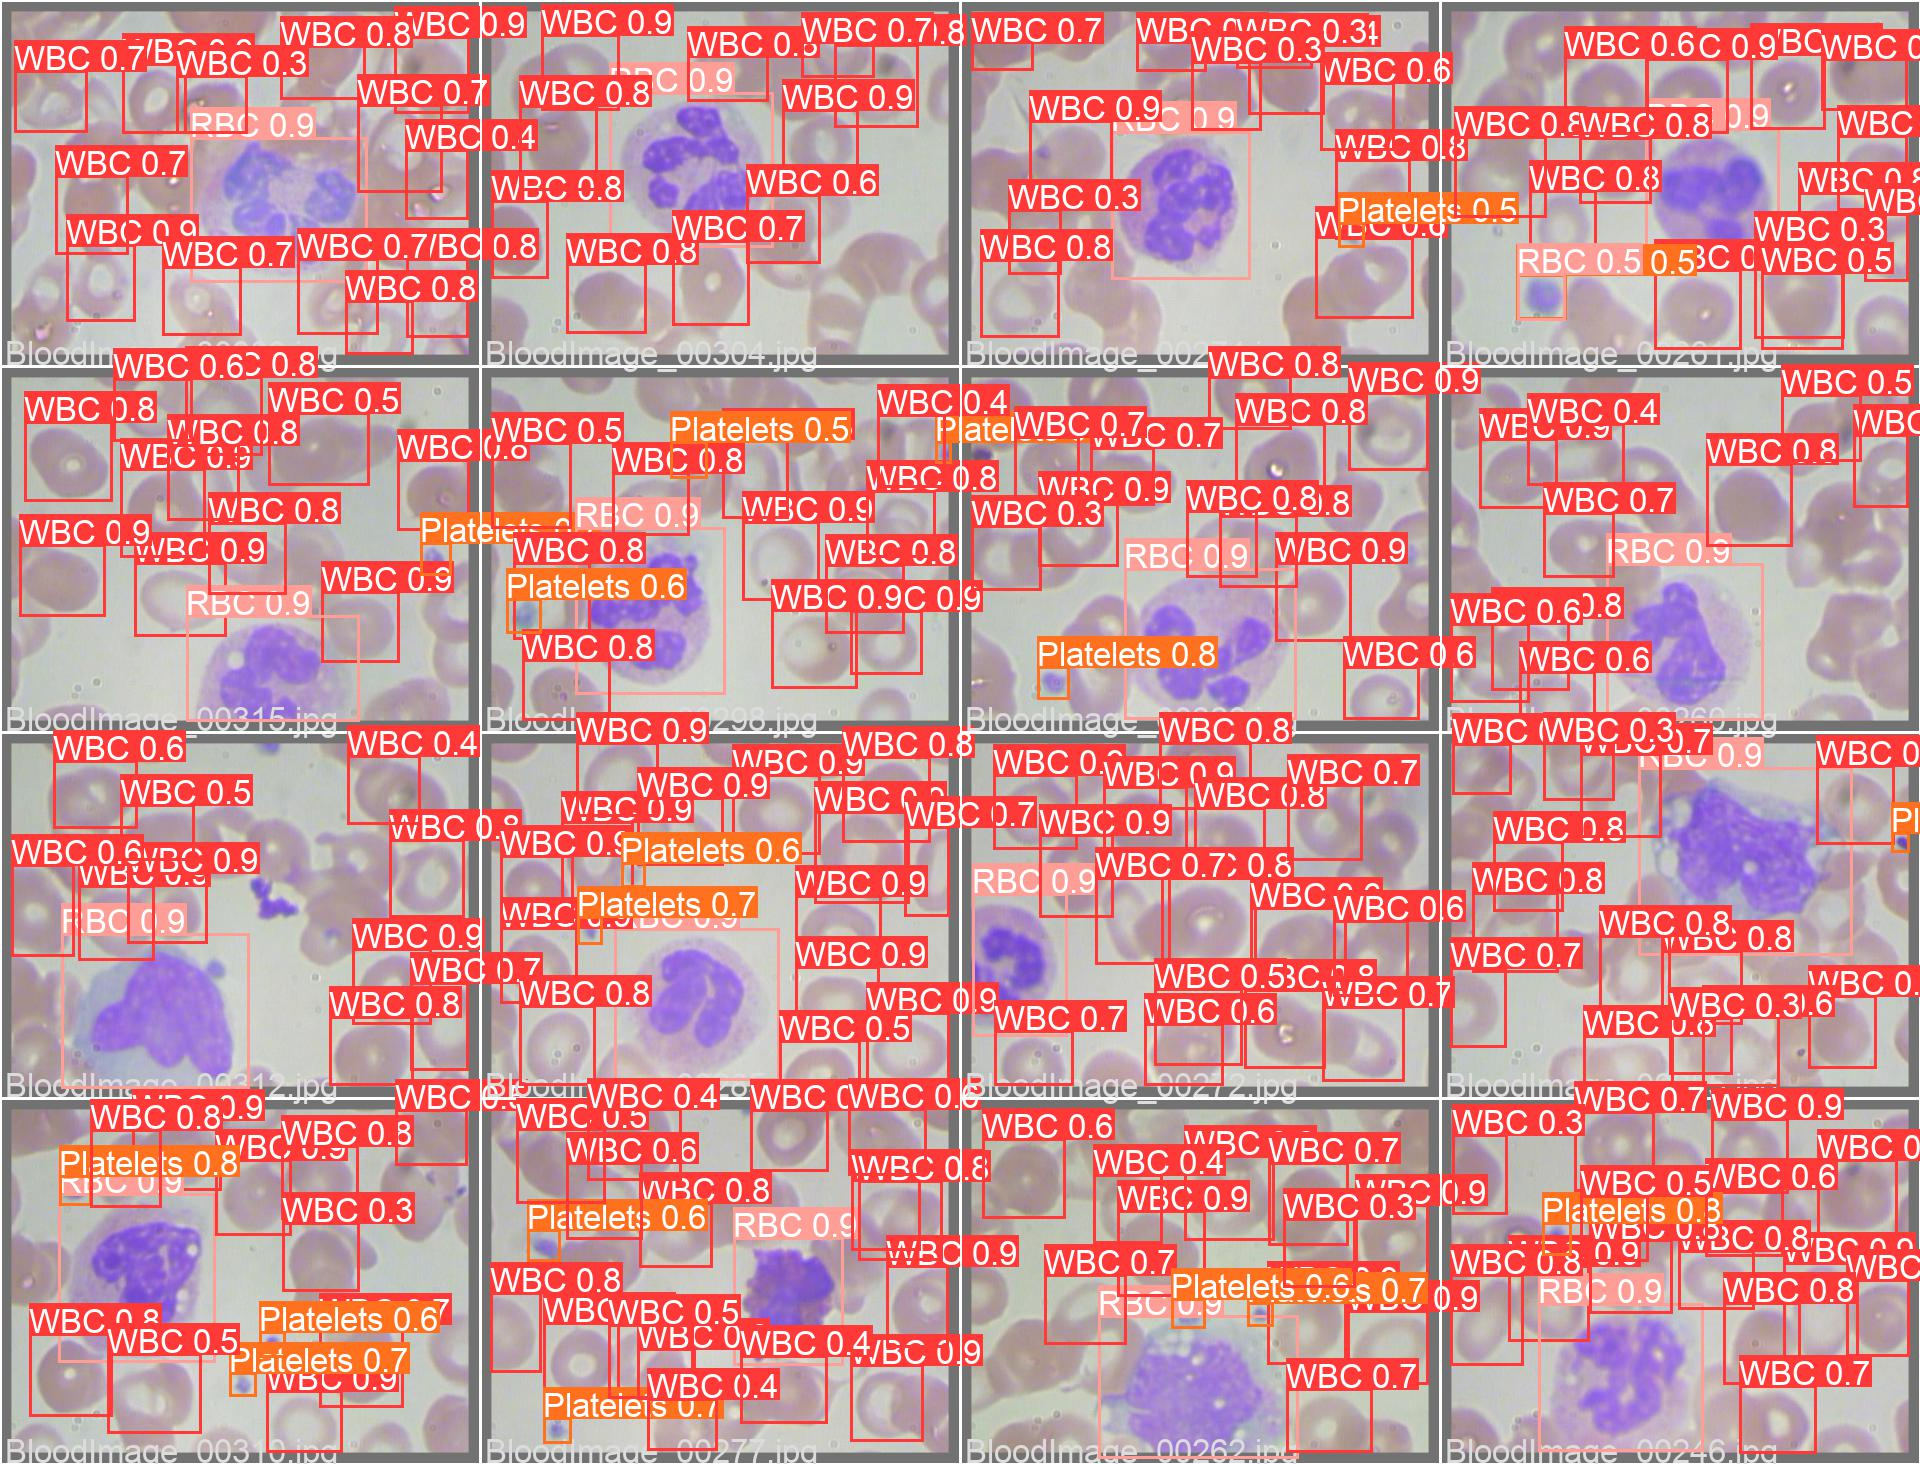

In [28]:
Image("/content/data/output/test_result/val_batch0_pred.jpg")